# Classification Model Evaluation Lab

## Predicting Chronic Kidney Disease in Patients

> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we're going to focus on steps exploring data, building models and evaluating the models we build.

There are three links you may find important:
- [A set of chronic kidney disease (CKD) data and other biological factors](./chronic_kidney_disease_full.csv).
- [The CKD data dictionary](./chronic_kidney_disease_header.txt).
- [An article comparing the use of k-nearest neighbors and support vector machines on predicting CKD](./chronic_kidney_disease.pdf).

## Step 1: Define the problem.

Suppose you're working for Mayo Clinic, widely recognized to be the top hospital in the United States. In your work, you've overheard nurses and doctors discuss test results, then arrive at a conclusion as to whether or not someone has developed a particular disease or condition. For example, you might overhear something like:

> **Nurse**: Male 57 year-old patient presents with severe chest pain. FDP _(short for fibrin degradation product)_ was elevated at 13. We did an echo _(echocardiogram)_ and it was inconclusive.

> **Doctor**: What was his interarm BP? _(blood pressure)_

> **Nurse**: Systolic was 140 on the right; 110 on the left.

> **Doctor**: Dammit, it's an aortic dissection! Get to the OR _(operating room)_ now!

> _(intense music playing)_

In this fictitious but [Shonda Rhimes-esque](https://en.wikipedia.org/wiki/Shonda_Rhimes#Grey's_Anatomy,_Private_Practice,_Scandal_and_other_projects_with_ABC) scenario, you might imagine the doctor going through a series of steps like a [flowchart](https://en.wikipedia.org/wiki/Flowchart), or a series of if-this-then-that steps to diagnose a patient. The first steps made the doctor ask what the interarm blood pressure was. Because interarm blood pressure took on the values it took on, the doctor diagnosed the patient with an aortic dissection.

Your goal, as a research biostatistical data scientist at the nation's top hospital, is to develop a medical test that can improve upon our current diagnosis system for [chronic kidney disease (CKD)](https://www.mayoclinic.org/diseases-conditions/chronic-kidney-disease/symptoms-causes/syc-20354521).

**Real-world problem**: Develop a medical diagnosis test that is better than our current diagnosis system for CKD.

**Data science problem**: Develop a medical diagnosis test that reduces both the number of false positives and the number of false negatives.

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

---

## Step 2: Obtain the data.

In [2]:
# Imports here
df = pd.read_csv("./chronic_kidney_disease_full.csv")

### 1. Read in the data.

In [3]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


### 2. Check out the data dictionary. What are a few features or relationships you might be interested in checking out?

Answer: blood pressure, anemia, creatine, diabetes mellitus, hemoglobin

---

## Step 3: Explore the data.

### 3. How much of the data is missing from each column?

In [4]:
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

### 4. Suppose that I dropped every row that contained at least one missing value. (In the context of analysis with missing data, we call this a "complete case analysis," because we keep only the complete cases!) How many rows would remain in our dataframe? What are at least two downsides to doing this?

> There's a good visual on slide 15 of [this deck](https://liberalarts.utexas.edu/prc/_files/cs/Missing-Data.pdf) that shows what a complete case analysis looks like if you're interested.  
**Note:** You can clean your data below in step 4 when building a model!

Answer: We would be left with only 158 rows. The downside to doing this is that we would be losing too much data by dropping all the rows with null values and could also not give an accurate representation of the data.

In [5]:
df[df.isnull().any(axis=1)]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,65.0,70.0,1.025,0.0,0.0,NaN,NaN,notpresent,notpresent,85.0,...,43.0,9600.0,4.5,no,no,no,good,no,no,notckd
363,67.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,99.0,...,44.0,5900.0,5.2,no,no,no,good,no,no,notckd
365,24.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,93.0,...,NaN,10700.0,6.3,no,no,no,good,no,no,notckd
378,71.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,NaN,...,42.0,7700.0,5.5,no,no,no,good,no,no,notckd


### 5. Thinking critically about how our data were gathered, it's likely that these records were gathered by doctors and nurses. Brainstorm three potential areas (in addition to the missing data we've already discussed) where this data might be inaccurate or imprecise.

Answer: If the doctors or nurses were using tools that were maybe calibrated diffrently they could get diffrent results or if each nurse or doctor is recording the data in a different manner.

---

## Step 4: Model the data.

### 6. Suppose that I want to construct a "model" where no person who has CKD will ever be told that they do not have CKD. What (very simple, no machine learning needed) model can I create that will never tell a person with CKD that they do not have CKD?

> Hint: Don't think about `statsmodels` or `scikit-learn` here.

Answer: A model that reports when someone has CKD.

### 7. In problem 6, what common classification metric did we optimize for? Did we minimize false positives or negatives?

Answer: We would have to optimize for sensitivity.

### 8. Thinking ethically, what is at least one disadvantage to the model you described in problem 6?

Answer: It would give everyone a postivie test for CDK even if they do not have it.

### 9. Suppose that I want to construct a "model" where a person who does not have CKD will ever be told that they do have CKD. What (very simple, no machine learning needed) model can I create that will accomplish this?

Answer: A model that reports that every person does not have CDK.

### 10. In problem 9, what common classification metric did we optimize for? Did we minimize false positives or negatives?

Answer: We would need to have optimization for specificity and we would need to optimize for false positives.

### 11. Thinking ethically, what is at least one disadvantage to the model you described in problem 9?

Answer: Every patient will be told that they do not have CDK even if they do.

### 12. Construct a logistic regression model in `sklearn` predicting class from the other variables. You may scale, select/drop, and engineer features as you wish - build a good model! Make sure, however, that you include at least one categorical/dummy feature and at least one quantitative feature.

> Hint 1: Remember to do a train/test split!  
> Hint 2: This will require data cleaning first!

In [6]:
df_model = df[['bp', 'ane', 'class', 'dm', 'hemo', 'sc']]

In [7]:
df_model.isnull().sum()

bp       12
ane       1
class     0
dm        2
hemo     52
sc       17
dtype: int64

In [8]:
df_model['class'] = df_model['class'].replace('ckd', 1)
df_model['class'] = df_model['class'].replace('notckd', 0)

df_model['dm'] = df_model['dm'].replace('yes', 1)
df_model['dm'] = df_model['dm'].replace('no', 0)

df_model['ane'] = df_model['ane'].replace('yes', 1)
df_model['ane'] = df_model['ane'].replace('no', 0)

/var/folders/6t/85msmsnj1ksb3tpnsplp1bc00000gn/T/ipykernel_15027/128263339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['class'] = df_model['class'].replace('ckd', 1)
/var/folders/6t/85msmsnj1ksb3tpnsplp1bc00000gn/T/ipykernel_15027/128263339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['class'] = df_model['class'].replace('notckd', 0)
/var/folders/6t/85msmsnj1ksb3tpnsplp1bc00000gn/T/ipykernel_15027/128263339.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [9]:
df_model = df_model.dropna()

In [10]:
df_model.isnull().sum()

bp       0
ane      0
class    0
dm       0
hemo     0
sc       0
dtype: int64

In [11]:
X = df_model.drop(columns=['class'])
y = df_model['class']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 13,
                                                    stratify=y)

In [12]:
ss = StandardScaler()

Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

In [14]:
log_reg = LogisticRegression()
log_reg.fit(Xs_train, y_train)

LogisticRegression()

In [19]:
df_model.head()

,bp,ane,class,dm,hemo,sc
0,80.0,0.0,1,1.0,15.4,1.2
1,50.0,0.0,1,0.0,11.3,0.8
2,80.0,1.0,1,1.0,9.6,1.8
3,70.0,1.0,1,0.0,11.2,3.8
4,80.0,0.0,1,0.0,11.6,1.4


---

## Step 5: Evaluate the model.

### 13. Based on your logistic regression model constructed in problem 12, interpret the coefficient of one of your quantitative features.

In [41]:
log_reg.coef_[0][0]

0.9712717874683813

According to this patients blood pressure he has a 97% chance of being positive for CKD

### 14. Based on your logistic regression model constructed in problem 12, interpret the coefficient of one of your categorical/dummy features.

In [54]:
log_reg.coef_[0][4]

1.8163594285476918

### 15. Despite being a relatively simple model, logistic regression is very widely used in the real world. Why do you think that's the case? Name at least two advantages to using logistic regression as a modeling technique.

Answer: It does a good job of interpreting binary problems and it is simple to implement, interpret, and very efficient to train.

### 16. Does it make sense to generate a confusion matrix on our training data or our test data? Why? Think about which data is used for model evaluation. Generate it on the proper data.

> Hint: Once you've generated your predicted $y$ values and you have your observed $y$ values, then it will be easy to [generate a confusion matrix using sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

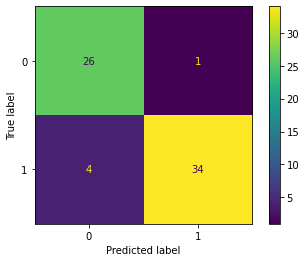

In [74]:
y_pred = log_reg.predict(Xs_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)

disp.plot()
plt.show()

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay

### 17. In this hospital case, we want to predict CKD. Do we want to optimize for sensitivity, specificity, or something else? Why? (If you don't think there's one clear answer, that's okay! There rarely is. Be sure to defend your conclusion!)

Answer: Since we want to test for a positive case of CKD we want sensitivity because we want patients who do have CKD to get an accurate test.

### 18 (BONUS). Write a function that will create an ROC curve for you, then plot the ROC curve.

Here's a strategy you might consider:
1. In order to even begin, you'll need some fit model. Use your logistic regression model from problem 12.
2. We want to look at all values of your "threshold" - that is, anything where .predict() gives you above your threshold falls in the "positive class," and anything that is below your threshold falls in the "negative class." Start the threshold at 0.
3. At this value of your threshold, calculate the sensitivity and specificity. Store these values.
4. Increment your threshold by some "step." Maybe set your step to be 0.01, or even smaller.
5. At this value of your threshold, calculate the sensitivity and specificity. Store these values.
6. Repeat steps 3 and 4 until you get to the threshold of 1.
7. Plot the values of sensitivity and 1 - specificity.

### 19. Suppose you're speaking with the biostatistics lead at Mayo Clinic, who asks you "Why are unbalanced classes generally a problem? Are they a problem in this particular CKD analysis?" How would you respond?

Answer: Unbalanced classes generally are a problem because they put more weight on one set of data over the other giving us a biased result.

### 20. Suppose you're speaking with a doctor at Mayo Clinic who, despite being very smart, doesn't know much about data science or statistics. How would you explain why unbalanced classes are generally a problem to this doctor?

Answer: If the data is unbalanced, there is a chance the model we are training could give out incorrect reading on the testing data becuase i created a model for one type of data and i am testing it with data that is different.

### 21. Let's create very unbalanced classes just for the sake of this example! Generate very unbalanced classes by [bootstrapping](http://stattrek.com/statistics/dictionary.aspx?definition=sampling_with_replacement) (a.k.a. random sampling with replacement) the majority class.

1. The majority class are those individuals with CKD.
2. Generate a random sample of size 200,000 of individuals who have CKD **with replacement**. (Consider setting a random seed for this part!). The [`pandas .sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) method may be _very_ useful here!
3. Create a new dataframe with the original data plus this random sample of data.
4. Now we should have a dataset with just over 200,000 observations, of which only about 0.075% are non-CKD individuals.

In [75]:
sample = df.sample(n = 200000, replace=True)

In [76]:
sample_df = pd.concat([sample, df])

In [78]:
sample.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
106,50.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,89.0,...,17.0,6500.0,NaN,yes,yes,no,good,yes,yes,ckd
364,73.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,118.0,...,45.0,9300.0,4.7,no,no,no,good,no,no,notckd
126,70.0,90.0,1.015,0.0,0.0,NaN,normal,notpresent,notpresent,144.0,...,37.0,8200.0,4.5,yes,yes,no,poor,yes,no,ckd
364,73.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,118.0,...,45.0,9300.0,4.7,no,no,no,good,no,no,notckd
256,60.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,...,41.0,10700.0,5.1,no,no,no,good,no,no,notckd


### 22. What do you expect will be the impact of unbalanced classes on your logistic regression model?

**Answer:** The model will end up being more unbalanced than before becuase we are making more samples of the same data creating a bigger unbalanced.

### 23. Build a logistic regression model on the unbalanced class data and evaluate its performance using whatever method(s) you see fit. 
> Be sure to look at how well it performs on non-CKD data.

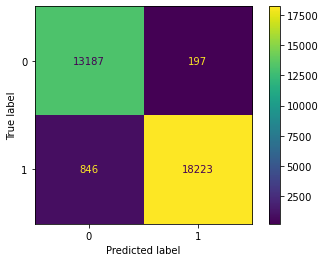

In [79]:
df_model = sample[['bp', 'ane', 'class', 'dm', 'hemo', 'sc']]
df_model = df_model.dropna()

df_model['class'] = df_model['class'].replace('ckd', 1)
df_model['class'] = df_model['class'].replace('notckd', 0)

df_model['dm'] = df_model['dm'].replace('yes', 1)
df_model['dm'] = df_model['dm'].replace('no', 0)

df_model['ane'] = df_model['ane'].replace('yes', 1)
df_model['ane'] = df_model['ane'].replace('no', 0)

X = df_model.drop(columns=['class'])
y = df_model['class']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 13,
                                                    stratify=y)

ss = StandardScaler()

Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(Xs_train, y_train)


y_pred = log_reg.predict(Xs_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)

disp.plot()
plt.show()

In [87]:
log_reg.score(Xs_train, y_train)

0.9695167515349475

In [90]:
log_reg.score(Xs_test, y_test)

0.9678612146796907

### 24. Do the results of your model above align with your expectations of the impact of unbalanced classes on logistic regression? If not, do you have any thoughts on why your model, considering the data, is performing how it is?

**Answer:**

---

## Step 6: Answer the problem. (Nothing to do here...except think about it!)

At this step, you would generally answer the problem! In this situation, you would likely present your model to doctors or administrators at the hospital and show how your model results in reduced false positives/false negatives. Next steps would be to find a way to roll this model and its conclusions out across the hospital so that the outcomes of patients with CKD (and without CKD!) can be improved!